## 📘 Project Overview: Statistical Analysis Using Python

### Objective of the Project

The main goal of this project is to **understand, analyze, and apply fundamental statistical concepts** using a real dataset and Python programming.
This project demonstrates how statistical theory connects with practical data analysis by combining **descriptive statistics**, **inferential statistics**, and **visual exploration**.

Through this project, we aim to answer questions such as:

* How can we summarize a dataset using statistical measures?
* How do we quantify variability and distribution?
* How can we statistically test hypotheses using real data?
* How do different groups compare with each other statistically?

---

## 🔍 What This Project Covers

The project is divided into multiple logical sections, each building on the previous one.

---

### 1️⃣ Exploratory Data Analysis (EDA)

We begin by understanding the structure of the dataset:

* Inspecting variables and their data types
* Identifying numerical and categorical features
* Understanding the overall distribution of the data

This step helps build intuition before applying statistical methods.

---

### 2️⃣ Measures of Central Tendency

We compute and interpret:

* **Mean** – average value
* **Median** – middle value
* **Mode** – most frequent value

These measures help summarize the “central location” of the data.

---

### 3️⃣ Measures of Dispersion

To understand variability in the data, we calculate:

* **Variance**
* **Standard Deviation**
* **Interquartile Range (IQR)**

These describe how spread out the values are around the center.

---

### 4️⃣ Understanding Data Distribution

We analyze:

* **Skewness** → direction of asymmetry
* **Kurtosis** → tail heaviness of the distribution

Visual tools such as histograms and boxplots are used to reinforce interpretation.

---

### 5️⃣ Hypothesis Testing

We apply statistical tests to draw conclusions from data:

#### a) One-sample t-test

Tests whether a sample mean differs from a known population mean.

#### b) Independent two-sample t-test

Compares means between two independent groups.

#### c) One-way ANOVA

Tests whether there are statistically significant differences among three or more groups.

Each test includes:

* Null and alternative hypotheses
* Test statistic
* p-value interpretation

---

### 6️⃣ Visualization for Statistical Insight

Data visualization plays a key role in understanding patterns:

* Histograms for distributions
* Boxplots for group comparison
* Scatter and density plots for relationship analysis

Visuals support and validate statistical findings.

---

### 7️⃣ Why This Project Matters

This project helps you:

✔ Understand core statistical concepts intuitively

✔ Apply theory to real-world datasets

✔ Learn how to perform statistical tests in Python

✔ Develop analytical thinking for data science tasks

✔ Build a strong foundation for advanced topics like regression and machine learning

---

### 8️⃣ Learning Outcomes

By completing this project, you will be able to:

* Compute and interpret descriptive statistics
* Choose appropriate statistical tests
* Perform hypothesis testing correctly
* Interpret p-values and statistical significance
* Communicate results clearly using tables and plots

# 1. Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

# 📌 2. Load and Explore Dataset

We’ll use the Iris dataset, a standard dataset for statistical analysis.

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["species"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 📌 3. Measures of Central Tendency
Mean, Median, Mode

In [4]:
mean_value = df["sepal length (cm)"].mean()
median_value = df["sepal length (cm)"].median()
mode_value = df["sepal length (cm)"].mode()[0]

mean_value, median_value, mode_value

(np.float64(5.843333333333334), 5.8, np.float64(5.0))

## Visualization

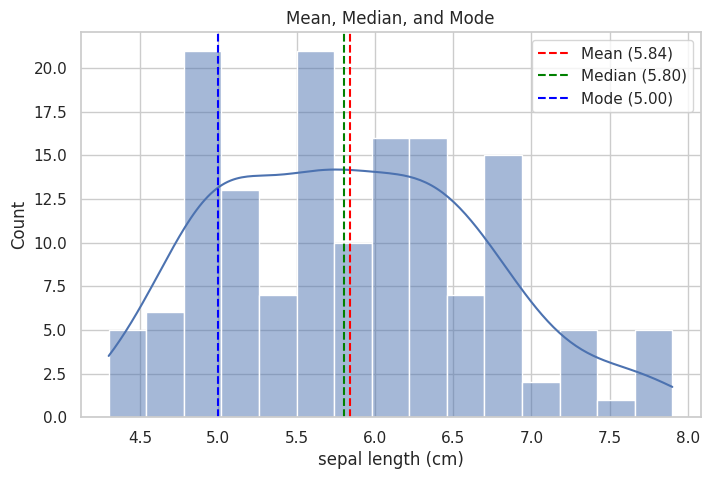

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["sepal length (cm)"], bins=15, kde=True)

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median ({median_value:.2f})')
plt.axvline(mode_value, color='blue', linestyle='--', label=f'Mode ({mode_value:.2f})')

plt.title("Mean, Median, and Mode")
plt.legend()
plt.show()

# 📌 4. Measures of Variability

In [7]:
variance = df["sepal length (cm)"].var()
std_dev = df["sepal length (cm)"].std()
iqr = np.percentile(df["sepal length (cm)"], 75) - np.percentile(df["sepal length (cm)"], 25)

variance, std_dev, iqr


(0.6856935123042505, 0.8280661279778629, np.float64(1.3000000000000007))

Interpretation

- Variance: spread of data
- Standard deviation: average deviation from mean
- IQR: middle 50% of data

# 📌 5. Distribution Shape

In [8]:
skewness = df["sepal length (cm)"].skew()
kurtosis = df["sepal length (cm)"].kurtosis()

skewness, kurtosis


(np.float64(0.3149109566369728), np.float64(-0.5520640413156395))

- Skewness > 0 → right-skewed
- Skewness < 0 → left-skewed
- Kurtosis > 0 → heavy tails

# 📌 6. Hypothesis Testing (One-Sample t-Test)
Question:

Is the mean sepal length significantly different from 5.8 cm?

In [9]:
t_stat, p_value = stats.ttest_1samp(df["sepal length (cm)"], 5.8)
t_stat, p_value


(np.float64(0.6409183514112012), np.float64(0.5225602746220779))

**Interpretation**

In [10]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Mean is significantly different")
else:
    print("Fail to reject H₀")


Fail to reject H₀


# 📌 7. Independent t-test (Two Groups)

Compare Setosa vs Versicolor

In [12]:
setosa = df[df["species"] == 0]["sepal length (cm)"]
versicolor = df[df["species"] == 1]["sepal length (cm)"]

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
t_stat, p_value


(np.float64(-10.52098626754911), np.float64(8.985235037487079e-18))

# 📌 8. One-Way ANOVA

Check if mean sepal length differs across all three species.

In [13]:
setosa = df[df["species"] == 0]["sepal length (cm)"]
versicolor = df[df["species"] == 1]["sepal length (cm)"]
virginica = df[df["species"] == 2]["sepal length (cm)"]

f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)
f_stat, p_val


(np.float64(119.26450218450468), np.float64(1.6696691907693826e-31))

Interpretation

- If p < 0.05, at least one group mean is significantly different.

# 📌 9. Visualization: Boxplot Comparison

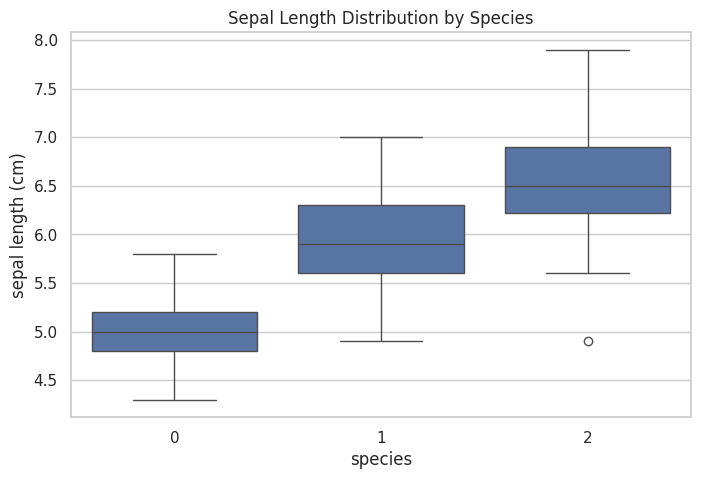

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.title("Sepal Length Distribution by Species")
plt.show()


# 📌 10. Summary Table

| Analysis Type      | Method Used            |
| ------------------ | ---------------------- |
| Central tendency   | Mean, Median, Mode     |
| Dispersion         | Variance, Std Dev, IQR |
| Distribution       | Skewness, Kurtosis     |
| Hypothesis testing | t-test, ANOVA          |
| Visualization      | Histogram, Boxplot     |
